In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
raw = pd.read_csv("train.csv")
raw.describe(include ="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

In [4]:
raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
columns=raw.columns
columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df=raw.copy()

In [7]:
df=df.drop(columns=['Id'])


In [8]:
def rel_freq(df, name):
    items_count=df[name].value_counts()
    tot_items=sum(items_count)
    percnt=[i/tot_items*100 for i in items_count]
    table=pd.DataFrame({'num_elem': items_count, 'percentage': percnt})
    return table

In [9]:
ms_subclass=rel_freq(df,"MSSubClass")
ms_subclass

,num_elem,percentage
MSSubClass,,
20,536,36.712329
60,299,20.479452
50,144,9.863014
120,87,5.958904
30,69,4.726027
160,63,4.315068
70,60,4.109589
80,58,3.972603
90,52,3.561644


In [10]:
df=df.drop(columns=['MSSubClass'])

In [11]:
ms_zoning=rel_freq(df,"MSZoning")
ms_zoning

,num_elem,percentage
MSZoning,,
RL,1151,78.835616
RM,218,14.931507
FV,65,4.452055
RH,16,1.095890
C (all),10,0.684932


In [12]:
df=df.drop(columns=["MSZoning"])

In [13]:
checkpoint_1=df.copy() #two variables dropped

(array([205., 643., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

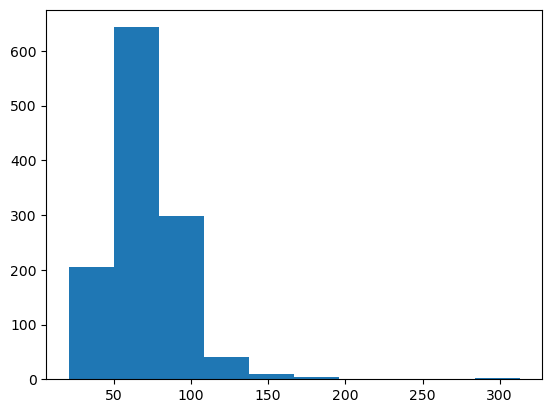

In [14]:
#LotFrontage describes the linear feet of street connected to a property, has missing values 
#from properties without street access 1460 - 1201 = 259 missing values around  18.7% of the samples of train
#we won't drop these values, al least not yet, properties without direct street access could be much cheaper
lotfrontage_count=df["LotFrontage"].value_counts()
plt.hist(df["LotFrontage"])
#after plotting the histogram we see a right skewed graph, after 150 sq feet there is a few values with a lot 
#of linear feet of street connected to the property

In [15]:
#print(sum(df["LotFrontage"].isnull())) #we deal with the 259 observations without street access by stablishing 
#this value to 0
df["LotFrontage"]=df["LotFrontage"].fillna(0)
df["LotFrontage"].describe()

#while we fixed one problem we still have the right tailing graph due to outliers far from the mean 300ft and so on

count    1460.000000
mean       57.623288
std        34.664304
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

(array([307., 416., 603., 110.,  17.,   5.,   0.,   0.,   0.,   2.]),
 array([  0. ,  31.3,  62.6,  93.9, 125.2, 156.5, 187.8, 219.1, 250.4,
        281.7, 313. ]),
 <BarContainer object of 10 artists>)

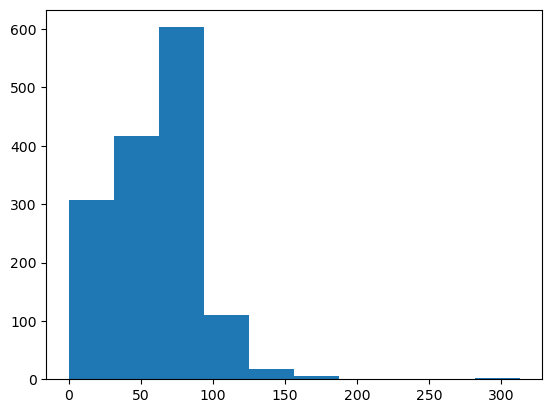

In [16]:
plt.hist(df["LotFrontage"])

(array([259.,  42.,  62., 146., 340., 345., 145.,  68.,  27.,  11.]),
 array([  0. ,  13.7,  27.4,  41.1,  54.8,  68.5,  82.2,  95.9, 109.6,
        123.3, 137. ]),
 <BarContainer object of 10 artists>)

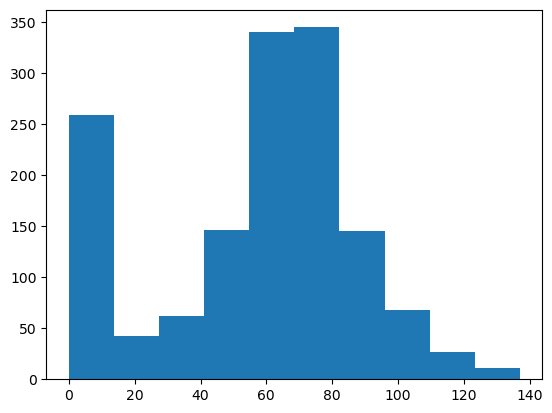

In [17]:
#after exploring the percentiles we could deal with the outliers by removing the observations higher than 99
#percent, if we don't the results could be skewed, we can safely remove them they are a small amount smaller than 5%
#of the total observations
df["LotFrontage"].quantile(0.99)
df = df.drop(df[df["LotFrontage"] >= df["LotFrontage"].quantile(0.99)].index)
plt.hist(df["LotFrontage"])

In [18]:
checkpoint_2=df.copy()

(array([1.386e+03, 4.200e+01, 9.000e+00, 4.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  1300.,  17636.,  33972.,  50308.,  66644.,  82980.,  99316.,
        115652., 131988., 148324., 164660.]),
 <BarContainer object of 10 artists>)

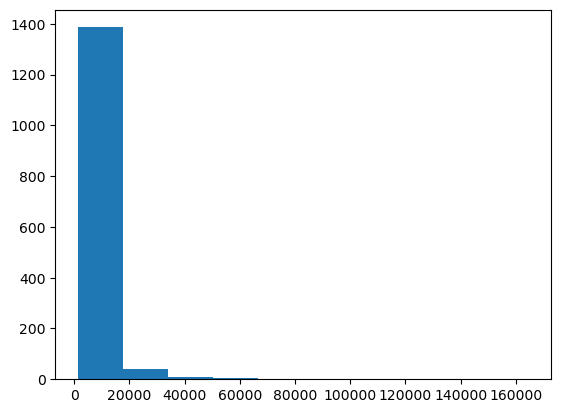

In [19]:
#LotArea: the size of the piece of land where the property is situated. In square ft
#we may have a similar problem here, some outliers and skewness
plt.hist(df["LotArea"])
#df["LotArea"].describe()
#temp=df[df["LotArea"] >= df["LotArea"].quantile(0.99)]
#len(temp)
#print(sum(df["LotFrontage"].isnull())) #no null values in LotArea

(array([134., 304., 642., 248.,  63.,  16.,  11.,   6.,   2.,   4.]),
 array([ 1300. ,  4683.3,  8066.6, 11449.9, 14833.2, 18216.5, 21599.8,
        24983.1, 28366.4, 31749.7, 35133. ]),
 <BarContainer object of 10 artists>)

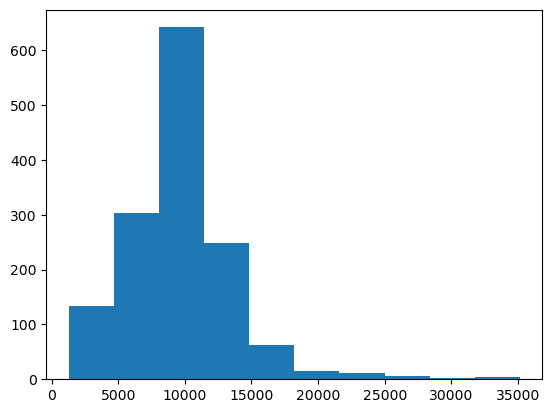

In [20]:
#len(temp)
df = df.drop(df[df["LotArea"] >= df["LotArea"].quantile(0.99)].index)
plt.hist(df["LotArea"])
#we drop those outliers, 23 observations total 

In [21]:
checkpoint_3 = df.copy()

In [22]:
#street describes the road access to property, either paved or gravel
#df["Street"].describe()
df["Street"].value_counts() #We are going to discard this variable, only 4 observations are gravel type vs 1418 paved  
#no null values

Street
Pave    1425
Grvl       5
Name: count, dtype: int64

In [23]:
df = df.drop(columns=["Street"])
df

,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,65.0,8450,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,80.0,9600,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,68.0,11250,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,60.0,9550,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,84.0,14260,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,85.0,13175,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,66.0,9042,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,68.0,9717,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [24]:
#alley type of alley access gravel, paved or no access
sum(df["Alley"].isnull())/len(df["Alley"])*100 #only 6.4% of the values are non null (with street access)
#we'll drop the variable for now
#plt.hist(df["Alley"])

93.7062937062937

In [25]:
df = df.drop(columns=["Alley"])

In [26]:
checkpoint_4=df.copy()

In [27]:
#LotShape describes the shape of the property
#more than 60% of observations have a regular shape, 32% are slightly irregular
#we'll keep it for now
lot_shape=rel_freq(df,"LotShape")
lot_shape

,num_elem,percentage
LotShape,,
Reg,922,64.475524
IR1,469,32.797203
IR2,33,2.307692
IR3,6,0.419580


,num_elem,percentage
LandContour,,
Lvl,1301,90.979021
Bnk,56,3.916084
HLS,46,3.216783
Low,27,1.888112


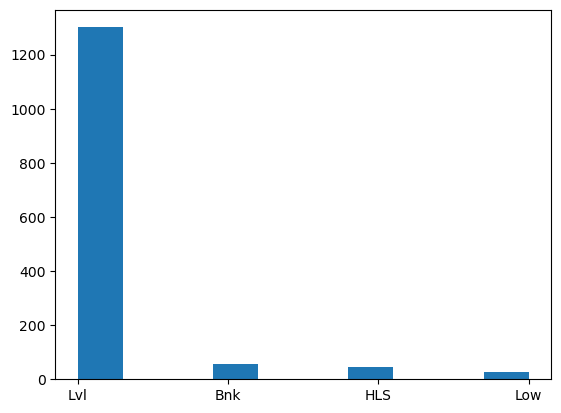

In [28]:
#LandContour: Flatness of the property, 4 groups from flat do depression
plt.hist(df["LandContour"])
land_contour=rel_freq(df,"LandContour")
land_contour
#given that almost all observations (>90%) belong to the same class it doesn't hold much information
#we'll drop it

In [29]:
df = df.drop(columns=["LandContour"])

(array([1.429e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

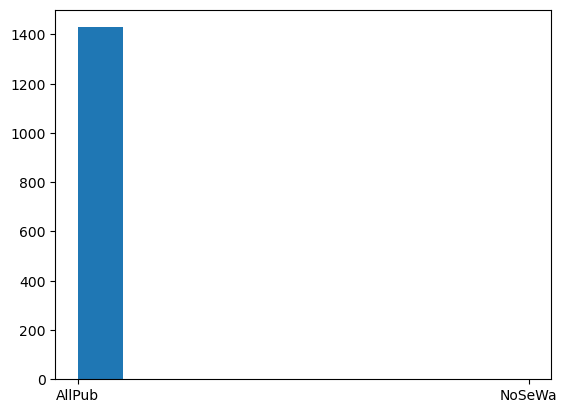

In [30]:
#utilities describes if there is water, electricity, gas, septic -> 4 classes [allpub, nosewr, nosewa, elo]
# completely useless there only 2 classes present and one of them holds only 2 values
#we drop the variable
plt.hist(df["Utilities"])
#sum(df["Utilities"].isnull())

In [31]:
df = df.drop(columns=["Utilities"])

In [32]:
checkpoint_5 = df.copy()

,num_elem,percentage
LotConfig,,
Inside,1039,72.657343
Corner,254,17.762238
CulDSac,86,6.013986
FR2,47,3.286713
FR3,4,0.279720


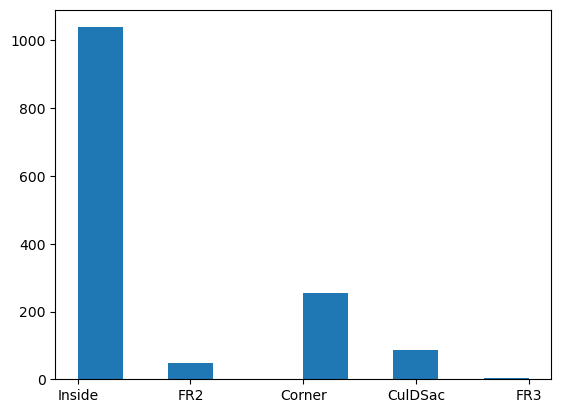

In [33]:
#LotConfig street - neighbouring houses configuration -> [inside, corner, culDsac,fr2,fr3]
plt.hist(df["LotConfig"])
lot_config=rel_freq(df,"LotConfig")
lot_config
#given that 3/5 classes contain at least 5% of he elements we wont drop the variable for now 

,num_elem,percentage
LandSlope,,
Gtl,1366,95.524476
Mod,57,3.986014
Sev,7,0.489510


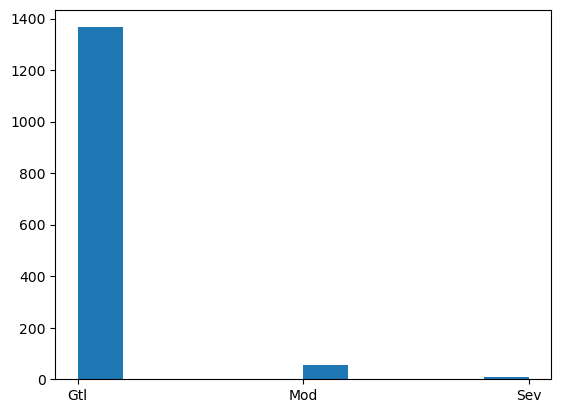

In [34]:
#LandSlope slope of property [gentle, moderate, severe]
plt.hist(df["LandSlope"])
land_slope=rel_freq(df,"LandSlope")
land_slope

#very badly distributed groups, 1 has 95% of the observations, drop

In [35]:
df = df.drop(columns=["LandSlope"])

,num_elem,percentage
Neighborhood,,
NAmes,222,15.524476
CollgCr,150,10.489510
OldTown,112,7.832168
Edwards,98,6.853147
Somerst,86,6.013986
NridgHt,77,5.384615
Sawyer,74,5.174825
Gilbert,74,5.174825
NWAmes,73,5.104895


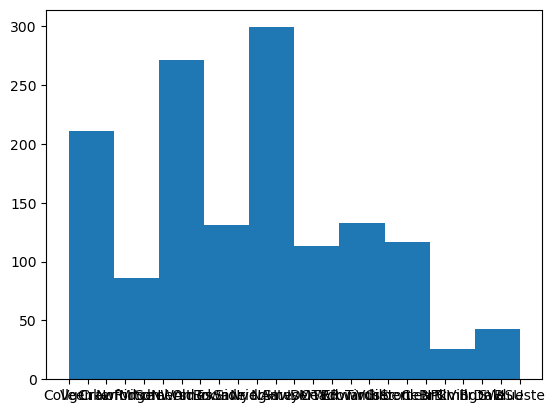

In [36]:
#df["Neighborhood"].describe()
plt.hist(df["Neighborhood"])
neighborhood=rel_freq(df,"Neighborhood")
neighborhood
#multiple categories, well distributed, no null values, keep
#sum(df["Neighborhood"].isnull())

,num_elem,percentage
Condition1,,
Norm,1236,86.433566
Feedr,78,5.454545
Artery,47,3.286713
RRAn,26,1.818182
PosN,18,1.258741
RRAe,11,0.769231
PosA,7,0.489510
RRNn,5,0.349650
RRNe,2,0.139860


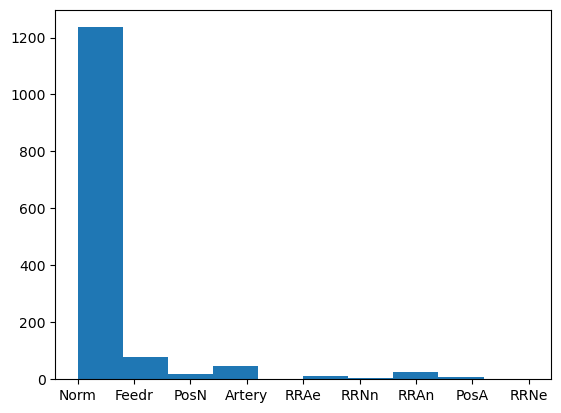

In [37]:
#Condition1: Proximity to various conditions such as roads, railroads, etc
plt.hist(df["Condition1"])
condition1=rel_freq(df,"Condition1")
condition1
#even though >86% of observations have the same value it's common knowledge that location and
#proximity to certain places greatly influences price, so we won't drop the variable now, we 
#consider doing it later based on its contribution to the model

,num_elem,percentage
Condition2,,
Norm,1416,99.020979
Feedr,6,0.419580
Artery,2,0.139860
RRNn,2,0.139860
PosA,1,0.069930
PosN,1,0.069930
RRAn,1,0.069930
RRAe,1,0.069930


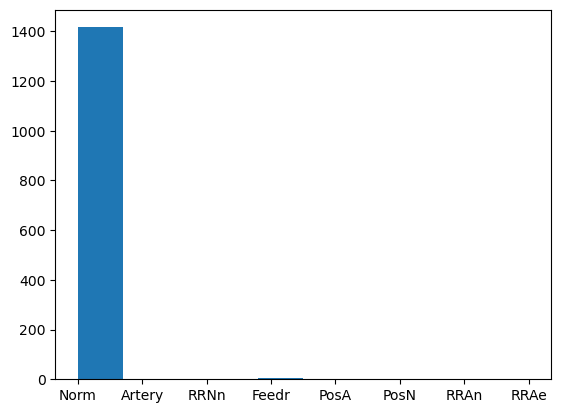

In [38]:
#Condition2: Proximity to various conditions such as roads, railroads, etc (if more than one is present)
plt.hist(df["Condition2"])
condition2=rel_freq(df,"Condition2")
condition2
#in this case 99% of observations fall into the same group, there is no information at first sight, 
#we drop the variable

In [39]:
df = df.drop(columns=["Condition2"])

In [40]:
checkpoint_6=df.copy()

,num_elem,percentage
BldgType,,
1Fam,1191,83.286713
TwnhsE,114,7.972028
Duplex,52,3.636364
Twnhs,43,3.006993
2fmCon,30,2.097902


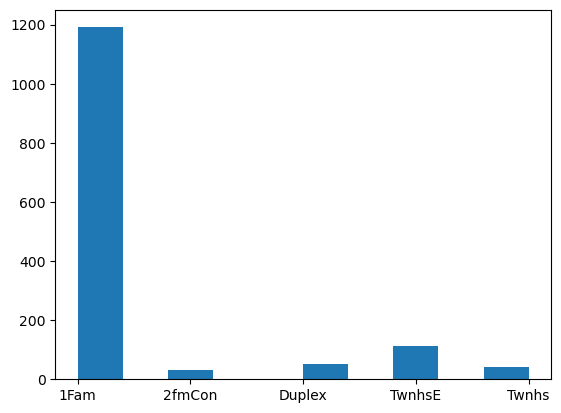

In [41]:
#bldgtype the type of dwelling, single family detached, 2 fam conversion, duplex, townhouse end unit,
#townhouse inside unit 
plt.hist(df["BldgType"])
bldg_type=rel_freq(df,"BldgType")
bldg_type
#only two types of houses have significant numbers in the dataset, we'll drop it for now

In [42]:
df = df.drop(columns=["BldgType"])

#study each variable and determine if its "worth" using it or should be dropped/adapted  
-id is useless to the model, drop   
-MSSubClass: categorical, does not include 150 class (1-1/2 STORY PUD - ALL AGES), dropped for now given that more than 50% of the samples fall into 2 classes.  RESTORE THIS ONE AND MAYBE THE ZONING 
-MSZoning: Categorical, in this case only one category has the 79% of the samples, we'll drop it for now  
-LotFrontage: Numerical, removed some ouliers to avoid skewness and filling the NaN with 0s  
-LotArea: Numerical, removed 23 outliers to avoid skewness no null values to be filled  
-Street: categorical, removed  
-Alley: categorical, removed  
-LotShape: categorical, 4 classes, describes the shape of the property, keep  
-LandContour: categorical, Flatness of the property, 4 classes almost all observations fall into the same cat. DROP  
-Utilities: categorical, water, electricity, etc. 4 classes almost all observations fall into the same cat. DROP  
-LotConfig: categorical, street and relation with neighbouring houses configuration, 5 classes, drop  
-LandSlope: categorical, slope of property [gentle, moderate, severe] 95% of the observations belong to one group, it looks like it doesn't add much information, drop  
-Neighborhood: categorical, Physical locations within Ames city limits, multiple categories, well distributed, no null values, keep  
-Condition1: categorical, Proximity to various conditions such as roads, railroads, etc, badly distributed but coud hold some importance, keep it  
-Condition2: same (if more than one is present) in this case drop, all observations have the same value, drop  
-BldgType: categorical, Type of dwelling, almost all observations fall into two categories of which 1 holds 86% of them, drop  
-HouseStyle: categorical, (one story, one and a half finished/unfinisehd, two story...)  

,num_elem,percentage
HouseStyle,,
1Story,713,49.860140
2Story,433,30.279720
1.5Fin,149,10.419580
SLvl,65,4.545455
SFoyer,37,2.587413
1.5Unf,14,0.979021
2.5Unf,11,0.769231
2.5Fin,8,0.559441


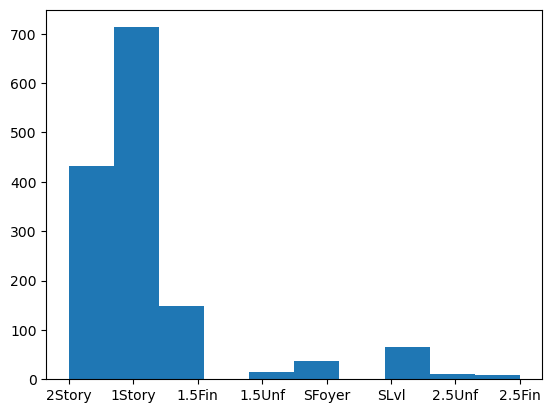

In [43]:
#HouseStyle (one story, one and a half finished/unfinisehd, two story...)
plt.hist(df["HouseStyle"])
house_style=rel_freq(df,"HouseStyle")
house_style
#not perfect, not horrible, keep it for now

count    1430.000000
mean        6.083916
std         1.368937
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

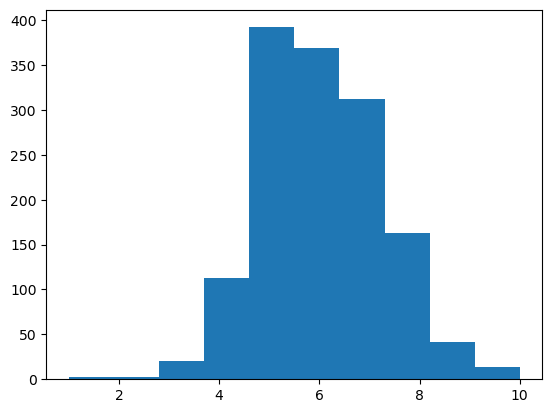

In [44]:
#OverallQual: Rates the overall material and finish of the house
plt.hist(df["OverallQual"])
df["OverallQual"].describe()
#well distributed no nulls, keep
#sum(df["OverallQual"].isnull())

count    1430.000000
mean        5.576923
std         1.115775
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

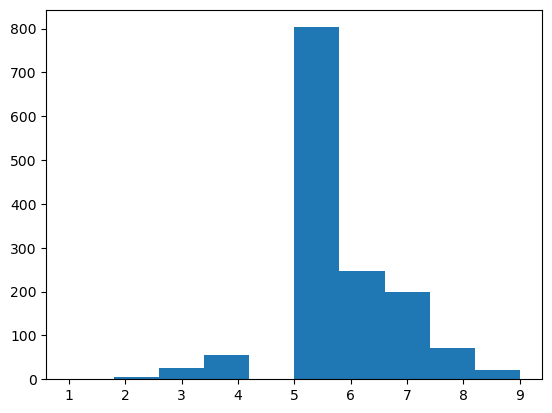

In [45]:
#OverallCond: Rates the overall condition of the house
plt.hist(df["OverallCond"])
df["OverallCond"].describe()
#sum(df["OverallCond"].isnull())
#not so badly distributed no nulls, keep, may drop later


count    1430.00000
mean     1971.26993
std        30.25395
min      1872.00000
25%      1954.00000
50%      1973.00000
75%      2000.75000
max      2010.00000
Name: YearBuilt, dtype: float64

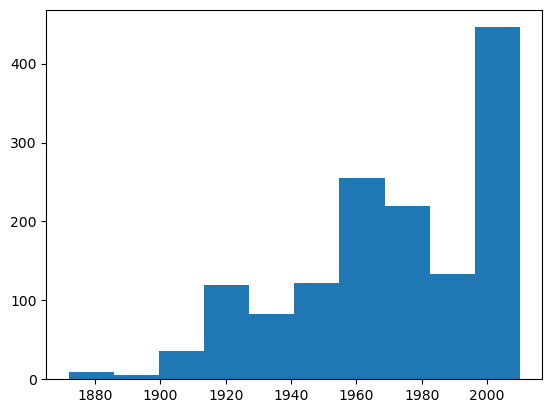

In [46]:
#YearBuilt: Original construction date
plt.hist(df["YearBuilt"])
df["YearBuilt"].describe()
#sum(df["YearBuilt"].isnull())
#keep

count    1430.000000
mean     1984.765035
std        20.663302
min      1950.000000
25%      1967.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

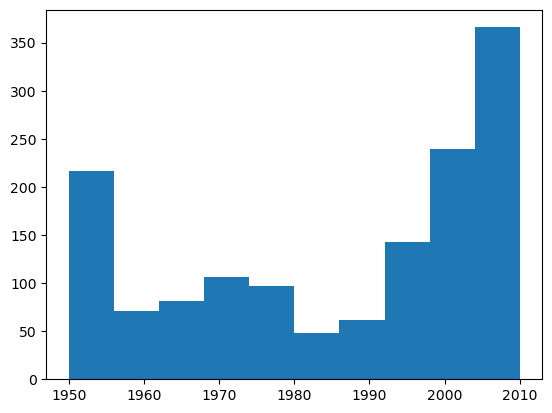

In [47]:
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
plt.hist(df["YearRemodAdd"])
df["YearRemodAdd"].describe()
#sum(df["YearRemodAdd"].isnull())
#keep

,num_elem,percentage
RoofStyle,,
Gable,1123,78.531469
Hip,277,19.370629
Gambrel,11,0.769231
Flat,10,0.699301
Mansard,7,0.489510
Shed,2,0.139860


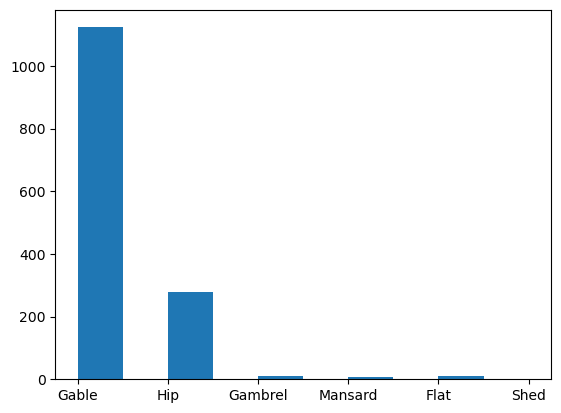

In [48]:
#RoofStyle: Type of roof [flat, gable, gambrel, hip, mansard, shed]
plt.hist(df["RoofStyle"])
roof_style=rel_freq(df,"RoofStyle")
roof_style
#almost all observations belong to 2 classes, we'll drop it for now

In [49]:
df=df.drop(columns=["RoofStyle"])

,num_elem,percentage
RoofMatl,,
CompShg,1410,98.601399
Tar&Grv,9,0.629371
WdShake,5,0.349650
WdShngl,4,0.279720
Metal,1,0.069930
Roll,1,0.069930


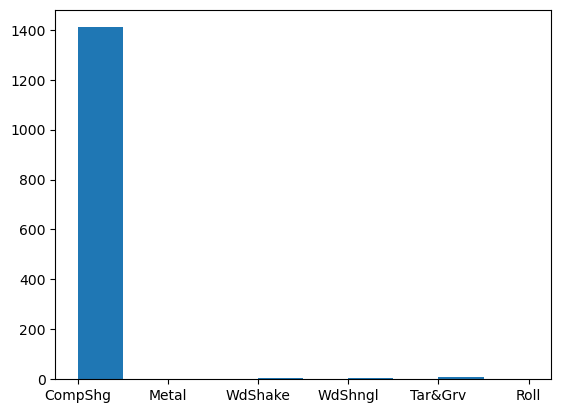

In [50]:
#RoofMatl: Roof material 
plt.hist(df["RoofMatl"])
roof_matl=rel_freq(df,"RoofMatl")
roof_matl
#pretty much irrelevant given that >98% observations have a standar material, drop

In [51]:
df=df.drop(columns=["RoofMatl"])

In [52]:
checkpoint_7 = df.copy()

,num_elem,percentage
Exterior1st,,
VinylSd,500,35.335689
HdBoard,219,15.477032
MetalSd,217,15.335689
Wd Sdng,197,13.922261
Plywood,102,7.208481
CemntBd,57,4.028269
BrkFace,48,3.392226
WdShing,25,1.766784
Stucco,23,1.625442


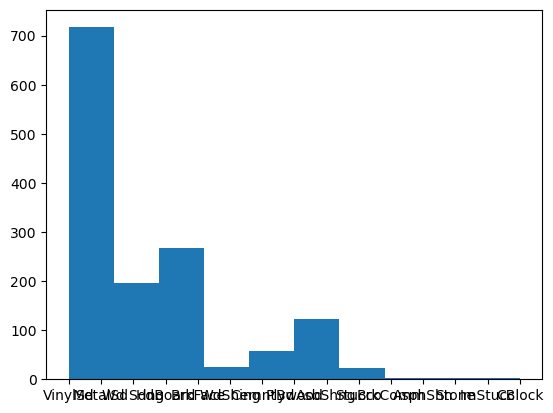

In [64]:
#Exterior1st: Exterior covering on house (material)
plt.hist(df["Exterior1st"])
exterior1st = rel_freq(df,"Exterior1st")
exterior1st
#no nulls
#keep

,num_elem,percentage
Exterior2nd,,
VinylSd,498,34.825175
MetalSd,213,14.895105
HdBoard,204,14.265734
Wd Sdng,190,13.286713
Plywood,136,9.510490
CmentBd,59,4.125874
Wd Shng,36,2.517483
BrkFace,24,1.678322
Stucco,24,1.678322


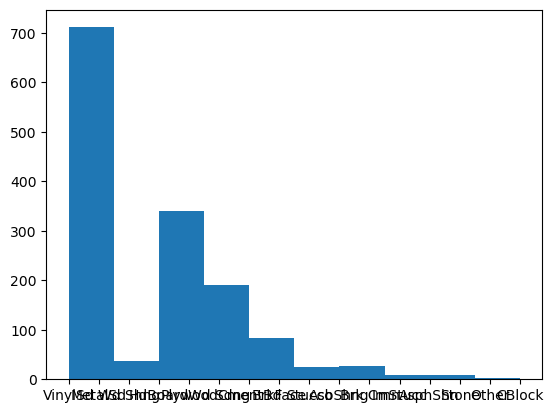

In [54]:
#Exterior2nd: Exterior covering on house (if more than one material)
plt.hist(df["Exterior2nd"])
exterior2nd = rel_freq(df,"Exterior2nd")
exterior2nd
#no nulls, keep
#sum(df["Exterior2nd"].isnull())

,num_elem,percentage
MasVnrType,,
None,852,60.212014
BrkFace,428,30.247350
Stone,122,8.621908
BrkCmn,13,0.918728


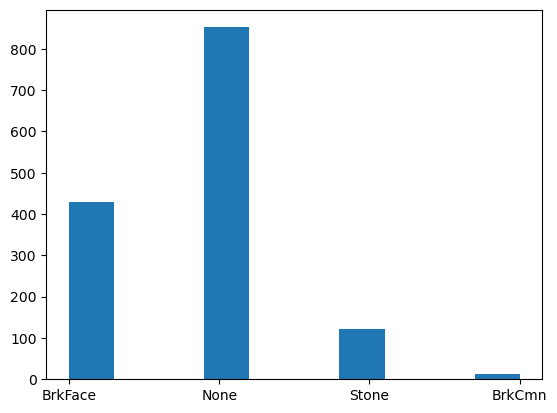

In [62]:
#MasVnrType: Masonry veneer type
# sum(df["MasVnrType"].isnull())
# contains high number of nulls, we fill the nulls with "None" because those are the ones without masonry
df["MasVnrType"]=df["MasVnrType"].fillna("None")
plt.hist(df["MasVnrType"])
mas_vnr_type=rel_freq(df,"MasVnrType")
mas_vnr_type
#keep

count    1422.000000
mean      101.562588
std       175.480236
min         0.000000
25%         0.000000
50%         0.000000
75%       164.750000
max      1600.000000
Name: MasVnrArea, dtype: float64

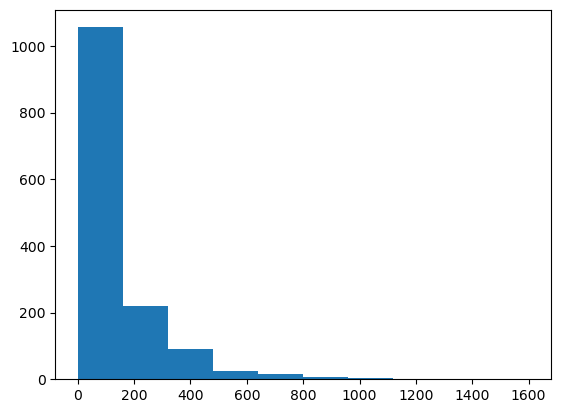

In [56]:
#MasVnrArea: Masonry veneer area in square feet
plt.hist(df["MasVnrArea"])
df["MasVnrArea"].describe()
#sum(df["MasVnrArea"].isnull())
#majority of observations don't have masonry veneer (8 nulls) or is very small,
#there is right skewness, we drop some observations (15 or the ones >= 0.99 quan)

In [57]:
len(df[df["MasVnrArea"] >= df["MasVnrArea"].quantile(0.99)])


15

(array([919., 131., 122.,  95.,  58.,  36.,  15.,  13.,  12.,   6.]),
 array([  0. ,  76.8, 153.6, 230.4, 307.2, 384. , 460.8, 537.6, 614.4,
        691.2, 768. ]),
 <BarContainer object of 10 artists>)

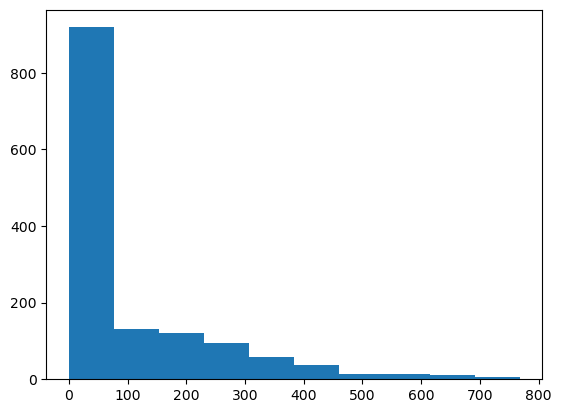

In [58]:
df = df.drop(df[df["MasVnrArea"] >= df["MasVnrArea"].quantile(0.99)].index)
plt.hist(df["MasVnrArea"])
#it's still very skewed but less outliers than before, we also fill the nulls

In [200]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

,num_elem,percentage
ExterQual,,
TA,887,62.685512
Gd,472,33.356890
Ex,42,2.968198
Fa,14,0.989399


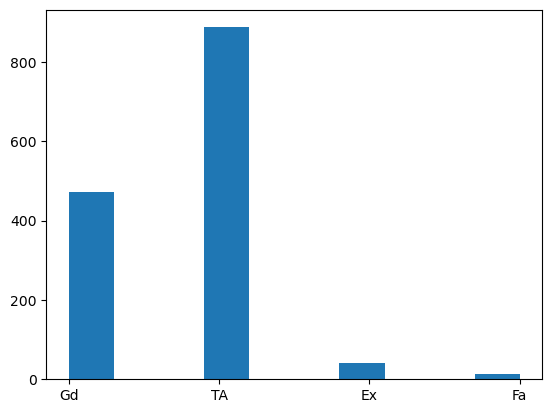

In [59]:
#ExterQual: Evaluates the quality of the material on the exterior 
plt.hist(df["ExterQual"])
exter_qual=rel_freq(df,"ExterQual")
exter_qual
#keep

,num_elem,percentage
ExterCond,,
TA,1241,87.703180
Gd,142,10.035336
Fa,28,1.978799
Ex,3,0.212014
Po,1,0.070671


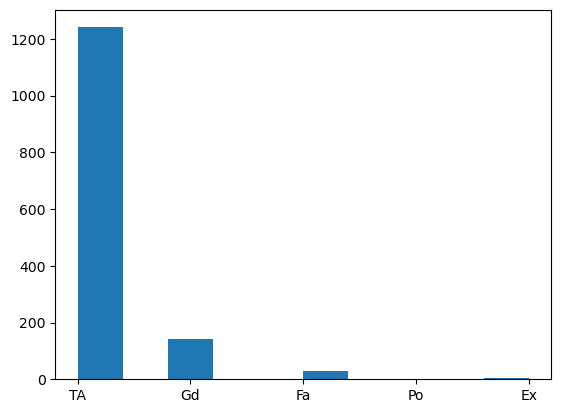

In [60]:
#ExterCond: Evaluates the present condition of the material on the exterior
plt.hist(df["ExterCond"])
exter_cond=rel_freq(df,"ExterCond")
exter_cond
#it may add some little information but given that 87% of the observations have a tipical condition 
# we'll drop it for now

,num_elem,percentage
Foundation,,
PConc,622,43.957597
CBlock,616,43.533569
BrkTil,145,10.247350
Slab,24,1.696113
Stone,6,0.424028
Wood,2,0.141343


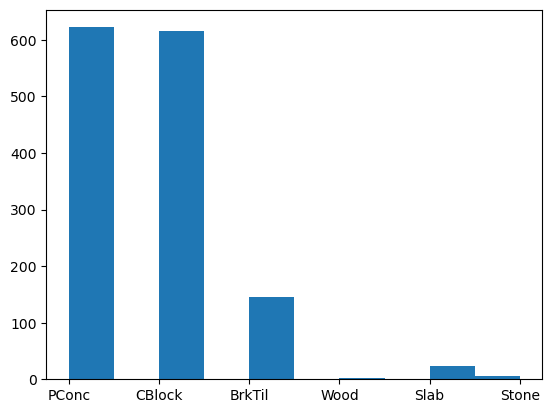

In [65]:
# Foundation: Type of foundation
plt.hist(df["Foundation"])
foundation=rel_freq(df,"Foundation")
foundation
#most observations fall under 3 categories so we'll keep it

,num_elem,percentage
BsmtQual,,
TA,638,45.088339
Gd,596,42.120141
Ex,109,7.703180
NB,37,2.614841
Fa,35,2.473498


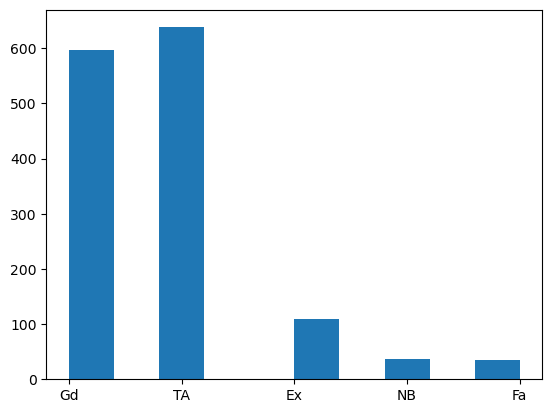

In [69]:
# BsmtQual: Evaluates the height of the basement
# sum(df["BsmtQual"].isnull()) #37 observations have no basement NaN we'll call this NB (no basement)
df["BsmtQual"] = df["BsmtQual"].fillna("NB")
plt.hist(df["BsmtQual"])
bsmt_qual=rel_freq(df,"BsmtQual")
bsmt_qual


In [73]:
# bsmtqual indicates the height in the original dataset but this is not intuitive, we change the name to BsmtHeight
df=df.rename(columns = {'BsmtQual':'BsmtHeight'})
df.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtHeight',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold

In [74]:
checkpoint_8 = df.copy()

,num_elem,percentage
BsmtCond,,
TA,1269,89.681979
Gd,62,4.381625
Fa,45,3.180212
NB,37,2.614841
Po,2,0.141343


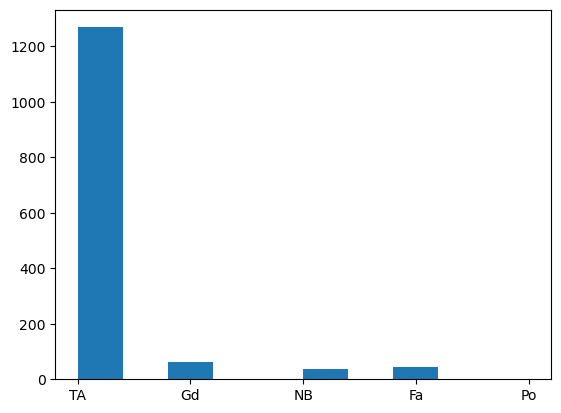

In [78]:
# BsmtCond: Evaluates the general condition of the basement
# sum(df["BsmtCond"].isnull()) #37 observations had no basement so they won't have a condition, 
# same as before fill with NB
df["BsmtCond"] = df["BsmtCond"].fillna("NB")
plt.hist(df["BsmtCond"])
bsmt_cond=rel_freq(df,"BsmtCond")
bsmt_cond
# we'll drop the variable given that most observations 89% share a tipical condition and provide very little help

In [79]:
df=df.drop(columns=["BsmtCond"])

,num_elem,percentage
BsmtExposure,,
No,937,66.219081
Av,212,14.982332
Gd,115,8.127208
Mn,113,7.985866
NB,38,2.685512


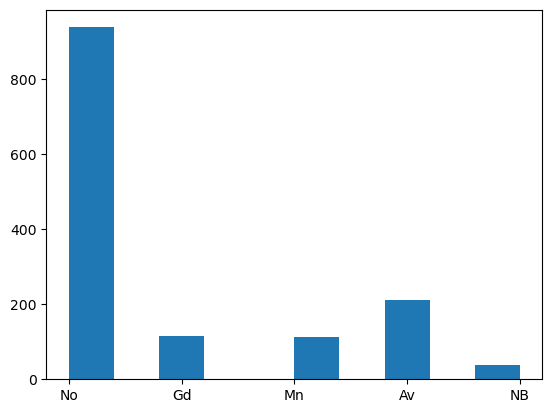

In [81]:
# BsmtExposure: Refers to walkout or garden level walls
# same as before fill with NB when there is no basement
df["BsmtExposure"] = df["BsmtExposure"].fillna("NB")
plt.hist(df["BsmtExposure"])
bsmt_exposure=rel_freq(df,"BsmtExposure")
bsmt_exposure #may provide some information keep for now

,num_elem,percentage
BsmtFinType1,,
Unf,421,29.752650
GLQ,397,28.056537
ALQ,214,15.123675
BLQ,144,10.176678
Rec,130,9.187279
LwQ,72,5.088339
NB,37,2.614841


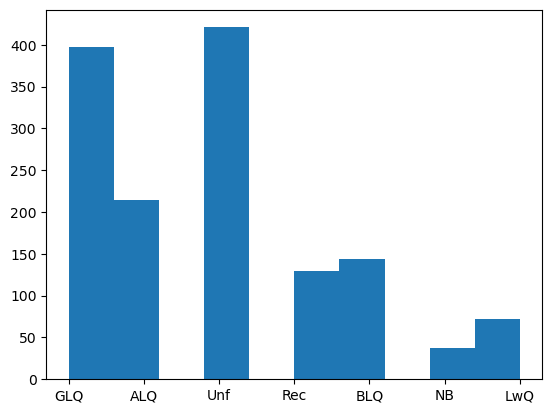

In [82]:
# BsmtFinType1: Rating of basement finished area
# same as before fill with NB when there is no basement
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("NB")
plt.hist(df["BsmtFinType1"])
bsmt_fin1=rel_freq(df,"BsmtFinType1")
bsmt_fin1
#keep

count    1415.000000
mean      429.568198
std       422.981593
min         0.000000
25%         0.000000
50%       377.000000
75%       700.000000
max      2188.000000
Name: BsmtFinSF1, dtype: float64

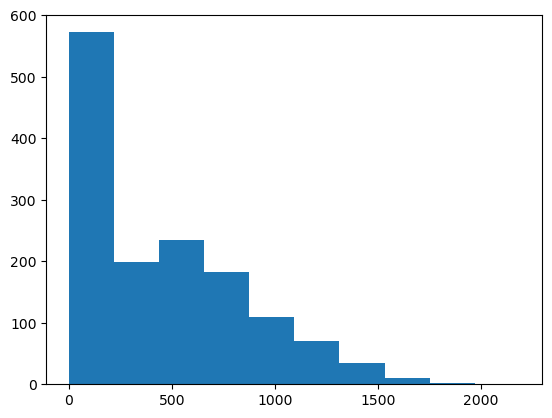

In [85]:
# BsmtFinSF1: Type 1 finished square feet
# sum(df["BsmtFinSF1"].isnull()) #no nulls
plt.hist(df["BsmtFinSF1"])
df["BsmtFinSF1"].describe()
#keep

,num_elem,percentage
BsmtFinType2,,
Unf,1219,86.148410
Rec,51,3.604240
LwQ,45,3.180212
NB,38,2.685512
BLQ,30,2.120141
ALQ,19,1.342756
GLQ,13,0.918728


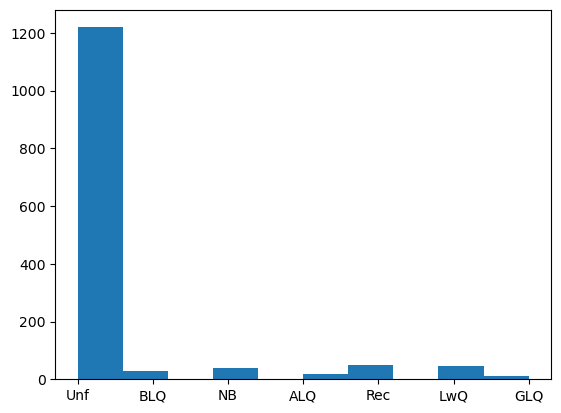

In [86]:
# BsmtFinType2: Rating of basement finished area (if multiple types)
# same as before fill with NB when there is no basement
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("NB")
plt.hist(df["BsmtFinType2"])
bsmt_fin2=rel_freq(df,"BsmtFinType2")
bsmt_fin2 #almost all observations are "unfinisehd" 86% drop 

In [87]:
# BsmtFinSF2: Type 2 finished square feet 
# because we dropped the correspondent one, we drop this one too
df=df.drop(columns=["BsmtFinType2", "BsmtFinSF2"])

count    1415.000000
mean      565.826148
std       438.498679
min         0.000000
25%       222.000000
50%       481.000000
75%       807.000000
max      2121.000000
Name: BsmtUnfSF, dtype: float64

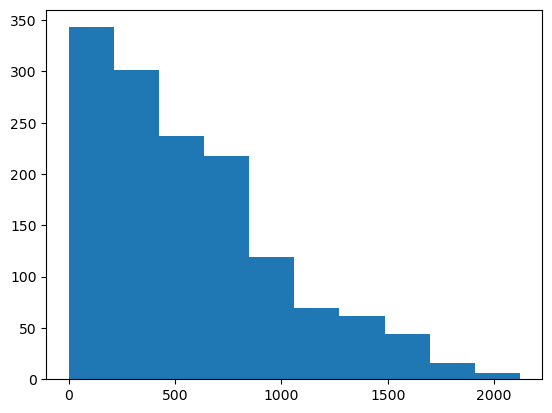

In [88]:
# BsmtUnfSF: Unfinished square feet of basement area
plt.hist(df["BsmtUnfSF"])
df["BsmtUnfSF"].describe()
# keep

count    1415.000000
mean      565.826148
std       438.498679
min         0.000000
25%       222.000000
50%       481.000000
75%       807.000000
max      2121.000000
Name: BsmtUnfSF, dtype: float64

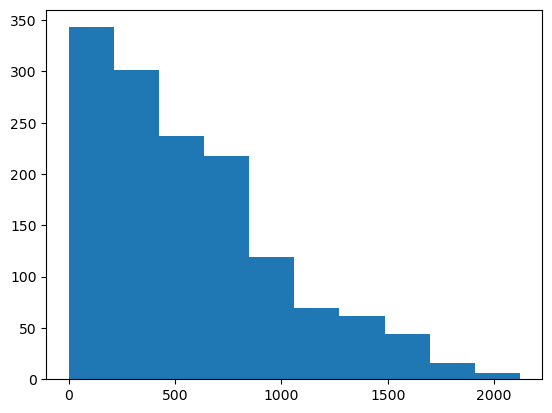

In [89]:
# TotalBsmtSF: Total square feet of basement area
plt.hist(df["BsmtUnfSF"])
df["BsmtUnfSF"].describe()
# keep

,num_elem,percentage
Heating,,
GasA,1385,97.879859
GasW,17,1.201413
Grav,6,0.424028
Wall,4,0.282686
OthW,2,0.141343
Floor,1,0.070671


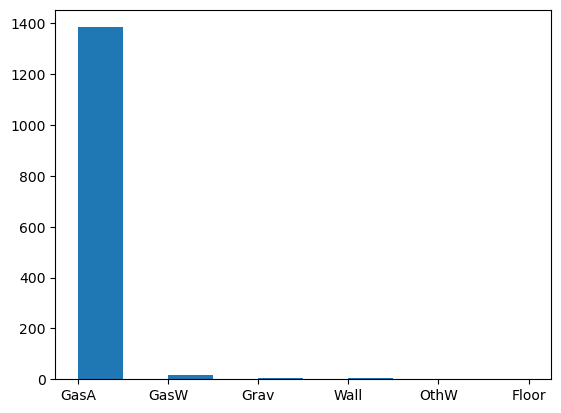

In [90]:
# Heating: Type of heating
plt.hist(df["Heating"])
heating=rel_freq(df,"Heating")
heating
# drop, almost all observations share "Gas forced warm air furnace" 97% 

,num_elem,percentage
HeatingQC,,
Ex,712,50.318021
TA,421,29.752650
Gd,235,16.607774
Fa,46,3.250883
Po,1,0.070671


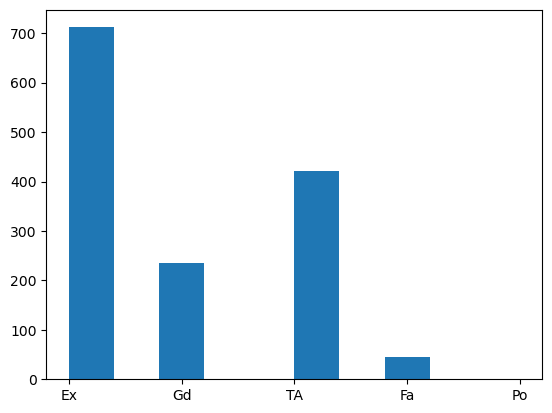

In [91]:
# HeatingQC: Heating quality and condition
plt.hist(df["HeatingQC"])
heating_qc=rel_freq(df,"HeatingQC")
heating_qc
#keep, most obsv have a positive valuation

,num_elem,percentage
CentralAir,,
Y,1321,93.35689
N,94,6.64311


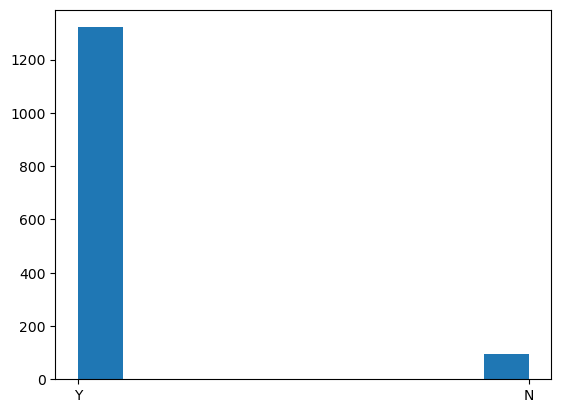

In [92]:
# CentralAir: Central air conditioning
plt.hist(df["CentralAir"])
central_air=rel_freq(df,"CentralAir")
central_air
# 93% have a yes value, drop

In [94]:
df=df.drop(columns=["CentralAir", "Heating"])

In [96]:
checkpoint_9=df.copy()

,num_elem,percentage
Electrical,,
SBrkr,1290,91.230552
FuseA,93,6.577086
FuseF,27,1.909477
FuseP,3,0.212164
Mix,1,0.070721


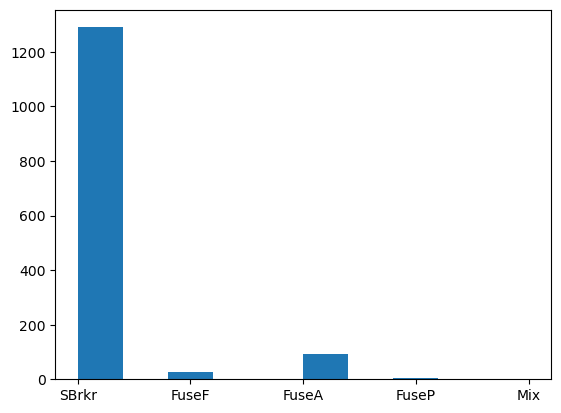

In [108]:
# Electrical: Electrical system
# sum(df["Electrical"].isnull()) #some nulls, 1 at this time in the preproc, we drop the nulls
df = df.drop(df[df["Electrical"].isnull()].index)
plt.hist(df["Electrical"])
elect=rel_freq(df,"Electrical")
elect
# drop, >90% observations have a standard breaker

In [109]:
df=df.drop(columns=["Electrical"])

count    1414.000000
mean     1148.173975
std       362.912465
min       334.000000
25%       879.250000
50%      1078.500000
75%      1370.000000
max      3228.000000
Name: 1stFlrSF, dtype: float64

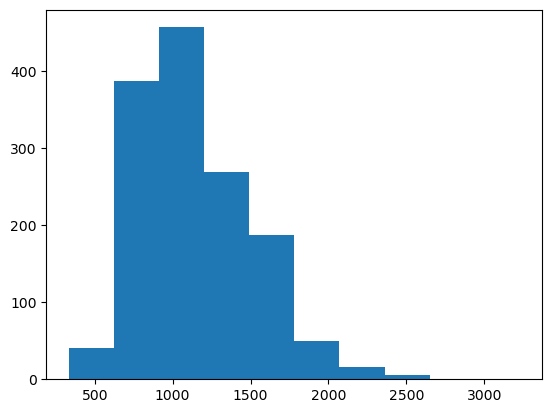

In [110]:
# 1stFlrSF: First Floor square feet
plt.hist(df["1stFlrSF"])
df["1stFlrSF"].describe()
#keep

count    1414.000000
mean      336.693777
std       425.538118
min         0.000000
25%         0.000000
50%         0.000000
75%       720.000000
max      1818.000000
Name: 2ndFlrSF, dtype: float64

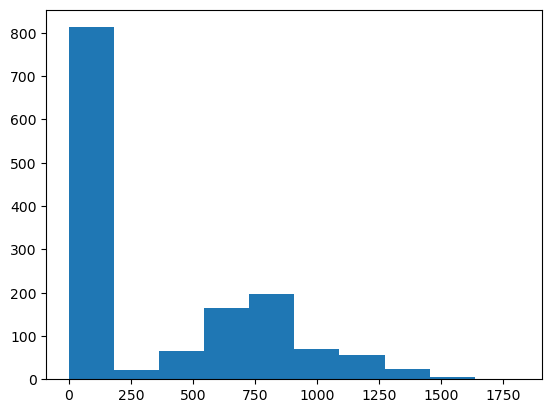

In [111]:
# 2ndFlrSF: Second floor square feet
plt.hist(df["2ndFlrSF"])
df["2ndFlrSF"].describe() 
# keep, spikes on 0 sqft maybe because there isn't a sencond floor

count    1414.000000
mean        5.418670
std        46.647116
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

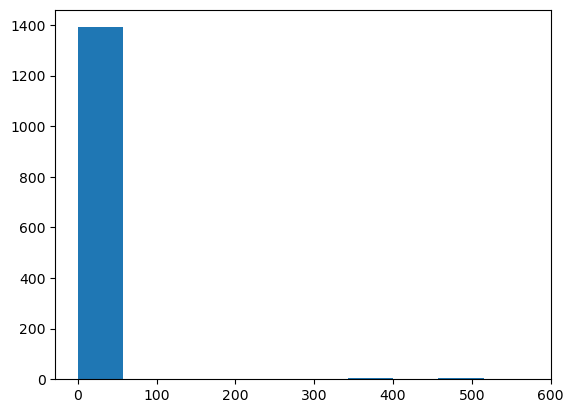

In [113]:
# LowQualFinSF: Low quality finished square feet (all floors)
plt.hist(df["LowQualFinSF"])
df["LowQualFinSF"].describe() 

# drop 

In [114]:
df = df.drop(columns=["LowQualFinSF"])

count    1414.000000
mean     1490.286421
std       481.867399
min       334.000000
25%      1124.250000
50%      1445.500000
75%      1755.000000
max      3608.000000
Name: GrLivArea, dtype: float64

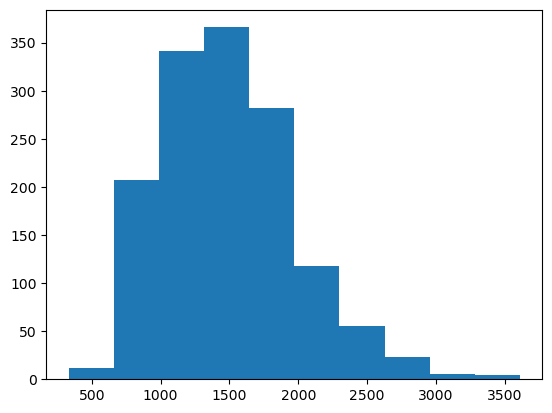

In [115]:
# GrLivArea: Above grade (ground) living area square feet
plt.hist(df["GrLivArea"])
df["GrLivArea"].describe() 
#keep

count    1414.000000
mean        0.417256
std         0.511592
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

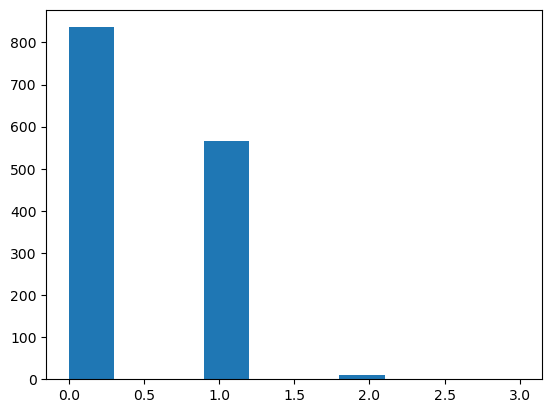

In [117]:
# BsmtFullBath: Basement full bathrooms
plt.hist(df["BsmtFullBath"])
df["BsmtFullBath"].describe() 
# 0,1,2 or 3
# may come in handy, keep, no nulls

count    1414.000000
mean        0.056577
std         0.237160
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

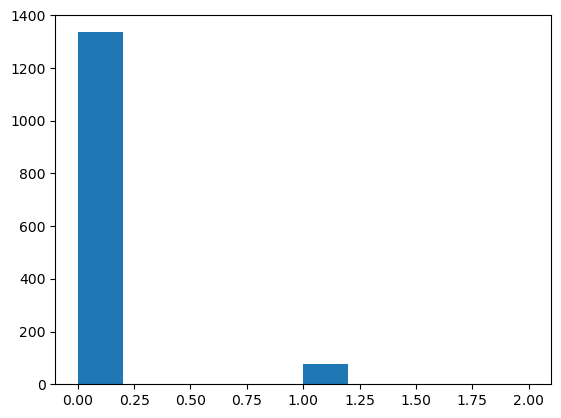

In [119]:
# BsmtHalfBath: Basement half bathrooms
plt.hist(df["BsmtHalfBath"])
df["BsmtHalfBath"].describe()
# may come in handy, keep, no nulls

count    1414.000000
mean        1.551627
std         0.541113
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

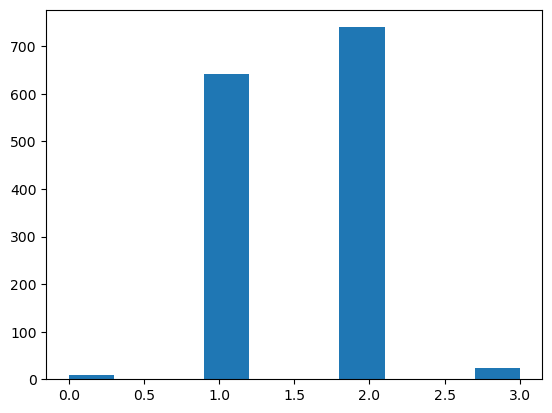

In [121]:
# FullBath: Full bathrooms above grade
plt.hist(df["FullBath"])
df["FullBath"].describe()
# no nulls, keep

In [138]:
null_data=df.isnull().sum(axis=0)
has_nulls=null_data.drop(null_data[null_data == 0].index)
has_nulls


MasVnrArea         8
FireplaceQu      684
GarageType        79
GarageYrBlt       79
GarageFinish      79
GarageQual        79
GarageCond        79
PoolQC          1410
Fence           1137
MiscFeature     1362
dtype: int64

count    1414.000000
mean        0.378359
std         0.502350
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64

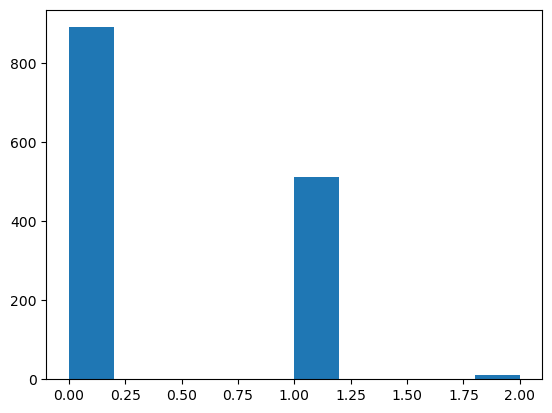

In [140]:
# HalfBath: Half baths above grade
plt.hist(df["HalfBath"])
df["HalfBath"].describe()
# keep

count    1414.000000
mean        0.378359
std         0.502350
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64

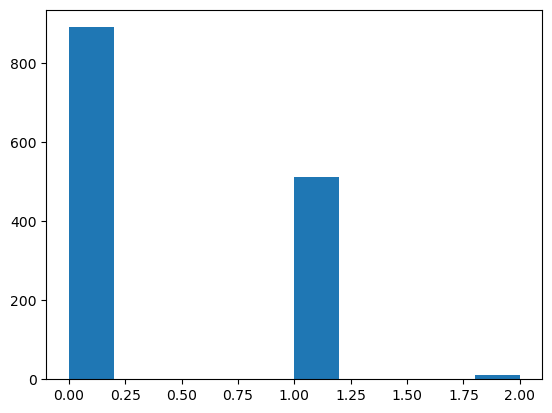

In [141]:
# Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
plt.hist(df["HalfBath"])
df["HalfBath"].describe()
# keep

count    1414.000000
mean        1.048091
std         0.223733
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64

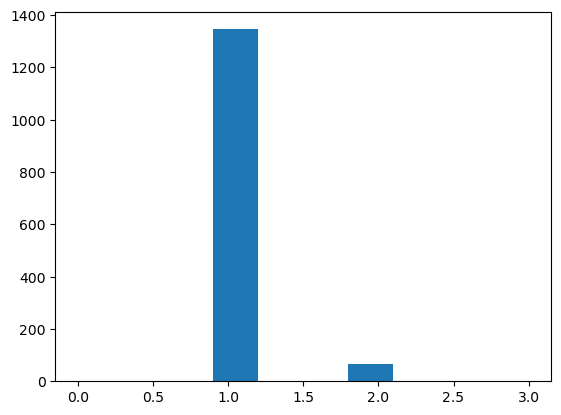

In [144]:
# KitchenAbvGr: Kitchens above grade
plt.hist(df["KitchenAbvGr"])
df["KitchenAbvGr"].describe()
# keep

,num_elem,percentage
KitchenQual,,
TA,722,51.060820
Gd,567,40.099010
Ex,87,6.152758
Fa,38,2.687412


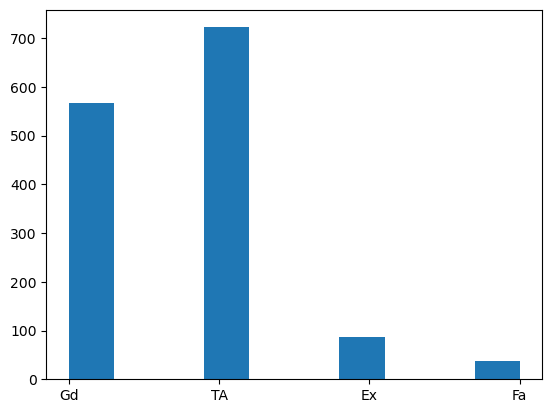

In [145]:
# KitchenQual: Kitchen quality
plt.hist(df["KitchenQual"])
kitchen_qual=rel_freq(df,"KitchenQual")
kitchen_qual
# keep

In [146]:
checkpoint_10 = df.copy()

count    1414.000000
mean        6.473833
std         1.589628
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

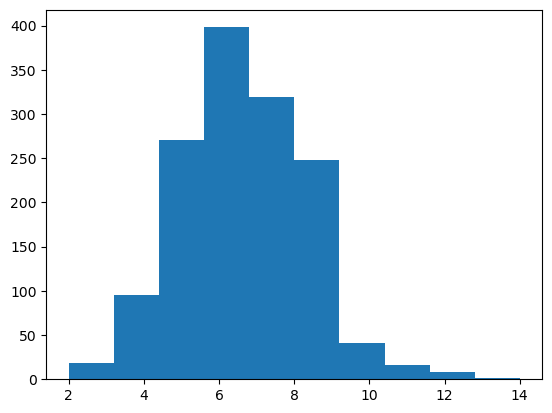

In [148]:
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
plt.hist(df["TotRmsAbvGrd"])
df["TotRmsAbvGrd"].describe()
# keep

,num_elem,percentage
Functional,,
Typ,1319,93.281471
Min2,34,2.404526
Min1,29,2.050919
Maj1,13,0.919378
Mod,13,0.919378
Maj2,5,0.353607
Sev,1,0.070721


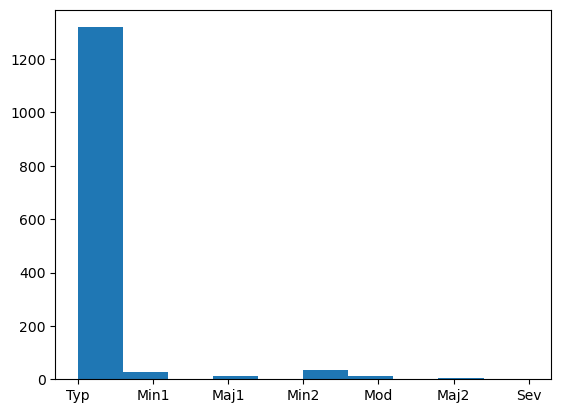

In [149]:
# Functional: Home functionality (Assume typical unless deductions are warranted)
plt.hist(df["Functional"])
functional=rel_freq(df,"Functional")
functional
# 93% are "typical" we'll drop it

In [150]:
df=df.drop(columns=["Functional"])

count    1414.000000
mean        0.592645
std         0.632547
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

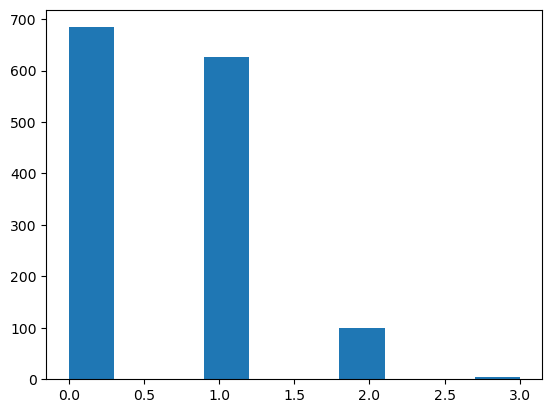

In [151]:
# Fireplaces: Number of fireplaces
plt.hist(df["Fireplaces"])
df["Fireplaces"].describe()
# keep

,num_elem,percentage
FireplaceQu,,
NF,684,48.373409
Gd,359,25.388967
TA,300,21.216407
Fa,31,2.192362
Ex,20,1.414427
Po,20,1.414427


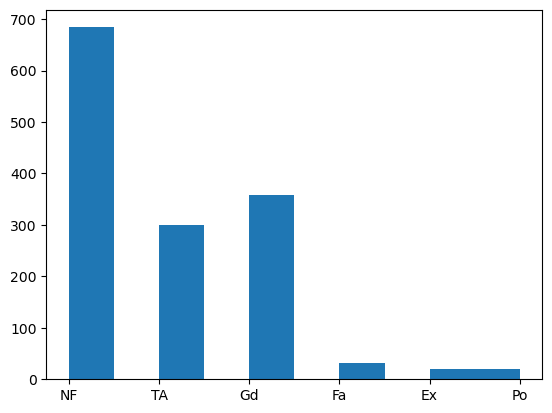

In [154]:
# FireplaceQu: Fireplace quality
df["FireplaceQu"] = df["FireplaceQu"].fillna("NF") # we fill the Nan with NF (No Fireplace) when there isn't one
plt.hist(df["FireplaceQu"])
fireplace_qu=rel_freq(df,"FireplaceQu")
fireplace_qu
# keep

,num_elem,percentage
GarageType,,
Attchd,842,59.547383
Detchd,380,26.874116
BuiltIn,80,5.657709
NG,79,5.586987
Basment,18,1.272984
CarPort,9,0.636492
2Types,6,0.424328


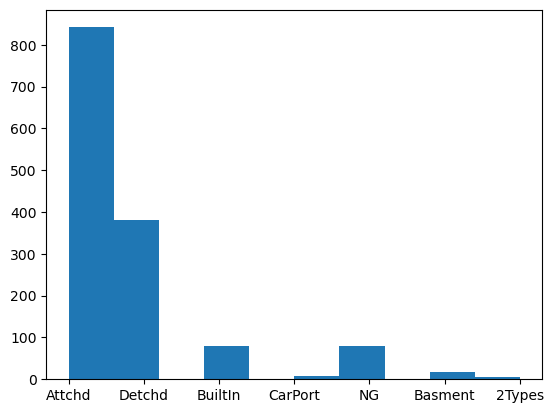

In [155]:
# GarageType: Garage location
df["GarageType"] = df["GarageType"].fillna("NG") # we fill the Nan with NG (No Garage) when there isn't one
plt.hist(df["GarageType"])
garage_type=rel_freq(df,"GarageType")
garage_type
# keep

count    1414.000000
mean     1978.368539
std        23.945158
min      1900.000000
25%      1962.000000
50%      1978.368539
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

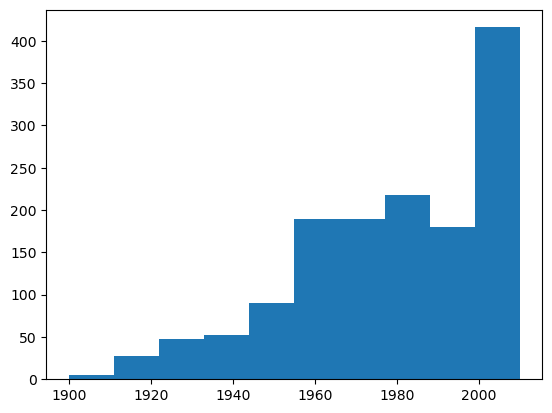

In [160]:
# GarageYrBlt: Year garage was built
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["GarageYrBlt"].mean())
plt.hist(df["GarageYrBlt"])
df["GarageYrBlt"].describe()
# has nulls when there is no garage, in this case we are going to fill them with the mean we may drop those
# values later
# keep

,num_elem,percentage
GarageFinish,,
Unf,595,42.079208
RFn,413,29.207921
Fin,327,23.125884
NG,79,5.586987


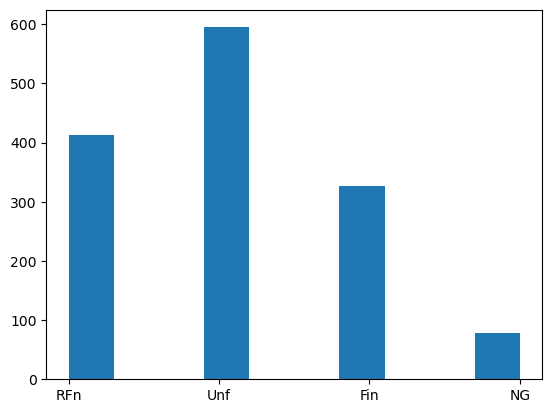

In [157]:
# GarageFinish: Interior finish of the garage
df["GarageFinish"] = df["GarageFinish"].fillna("NG") # we fill the Nan with NG (No Garage) when there isn't one
plt.hist(df["GarageFinish"])
garage_finish=rel_freq(df,"GarageFinish")
garage_finish
# keep

count    1414.000000
mean        1.749646
std         0.742681
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

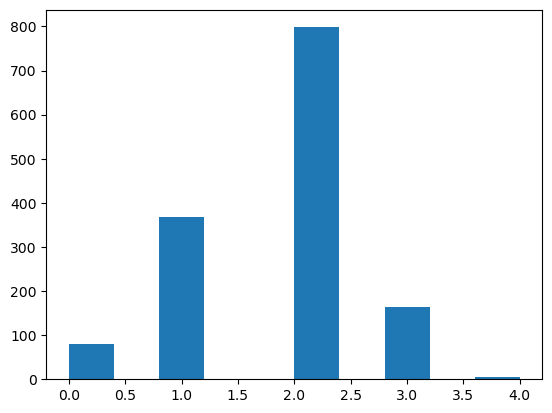

In [161]:
# GarageCars: Size of garage in car capacity
plt.hist(df["GarageCars"])
df["GarageCars"].describe()
# keep

count    1414.000000
mean      468.239745
std       210.597448
min         0.000000
25%       319.250000
50%       475.500000
75%       576.000000
max      1390.000000
Name: GarageArea, dtype: float64

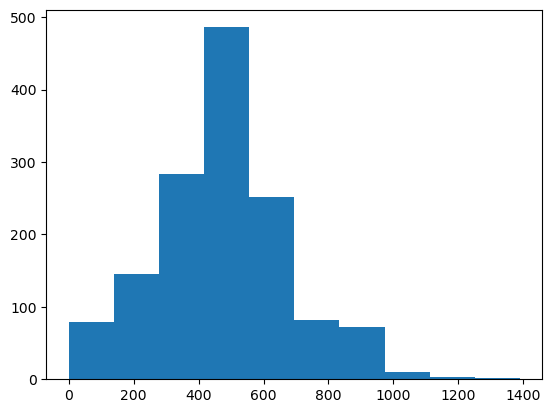

In [162]:
# GarageArea: Size of garage in square feet
plt.hist(df["GarageArea"])
df["GarageArea"].describe()
# keep

,num_elem,percentage
GarageQual,,
TA,1268,89.674682
NG,79,5.586987
Fa,47,3.323904
Gd,14,0.990099
Ex,3,0.212164
Po,3,0.212164


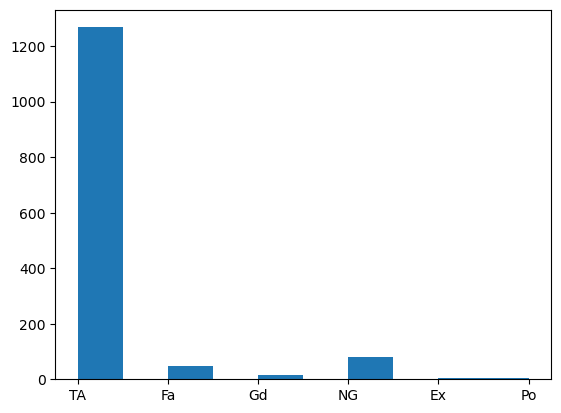

In [165]:
# GarageQual: Garage quality
df["GarageQual"] = df["GarageQual"].fillna("NG") # we fill the Nan with NG (No Garage) when there isn't one
plt.hist(df["GarageQual"])
garage_qual=rel_freq(df,"GarageQual")
garage_qual
# 90 % average, very little info. drop

In [166]:
df = df.drop(columns=["GarageQual"])

,num_elem,percentage
GarageCond,,
TA,1282,90.664781
NG,79,5.586987
Fa,35,2.475248
Gd,9,0.636492
Po,7,0.495050
Ex,2,0.141443


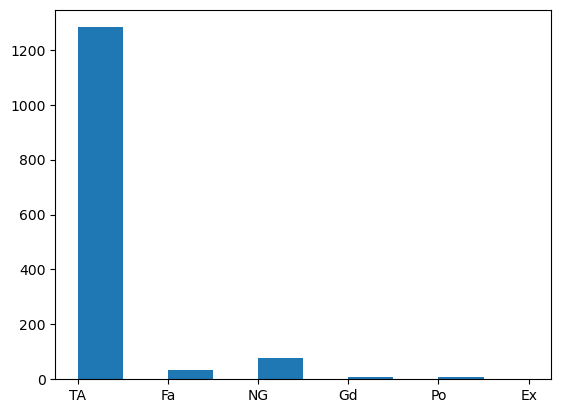

In [168]:
# GarageCond: Garage condition
df["GarageCond"] = df["GarageCond"].fillna("NG") # we fill the Nan with NG (No Garage) when there isn't one
plt.hist(df["GarageCond"])
garage_cond=rel_freq(df,"GarageCond")
garage_cond
# same as before, drop

,num_elem,percentage
PavedDrive,,
Y,1298,91.796322
N,87,6.152758
P,29,2.050919


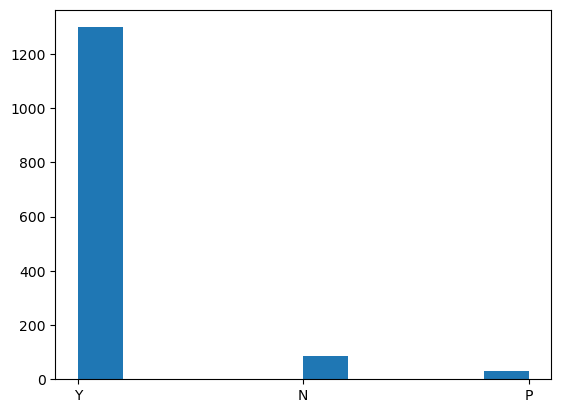

In [169]:
# PavedDrive: Paved driveway
plt.hist(df["PavedDrive"])
paved_drive=rel_freq(df,"PavedDrive")
paved_drive
# 92% are paved, little info, drop

count    1414.000000
mean       91.152051
std       121.137462
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       736.000000
Name: WoodDeckSF, dtype: float64

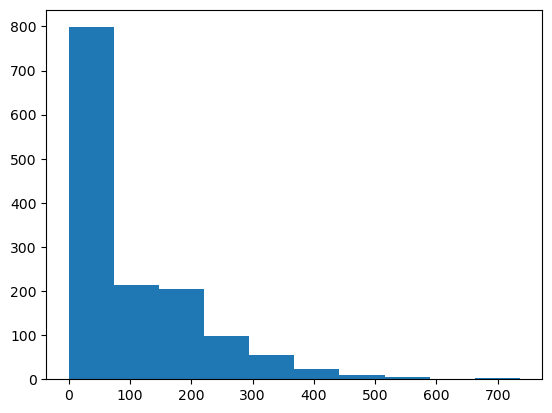

In [171]:
# WoodDeckSF: Wood deck area in square feet
plt.hist(df["WoodDeckSF"])
df["WoodDeckSF"].describe()
# keep

count    1414.000000
mean       46.005658
std        65.259653
min         0.000000
25%         0.000000
50%        24.000000
75%        66.750000
max       547.000000
Name: OpenPorchSF, dtype: float64

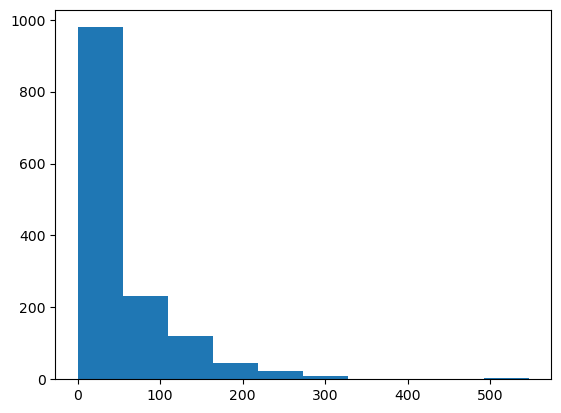

In [173]:
# OpenPorchSF: Open porch area in square feet
plt.hist(df["OpenPorchSF"])
df["OpenPorchSF"].describe()
# has outliers we drop those

(array([722., 245., 158.,  80.,  77.,  47.,  24.,  21.,  13.,  12.]),
 array([  0. ,  26.7,  53.4,  80.1, 106.8, 133.5, 160.2, 186.9, 213.6,
        240.3, 267. ]),
 <BarContainer object of 10 artists>)

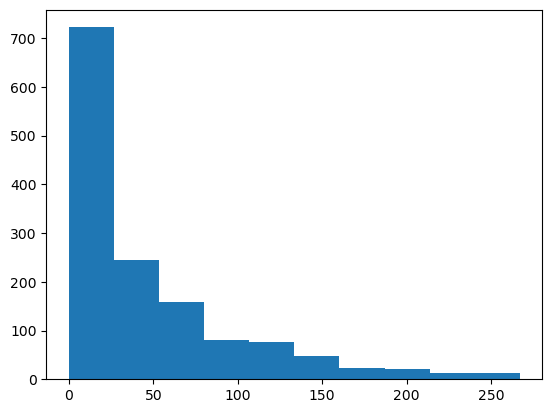

In [175]:
df = df.drop(df[df["OpenPorchSF"] >= df["OpenPorchSF"].quantile(0.99)].index)
plt.hist(df["OpenPorchSF"])
# keep the rest

count    1399.000000
mean       22.103645
std        60.329294
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       386.000000
Name: EnclosedPorch, dtype: float64

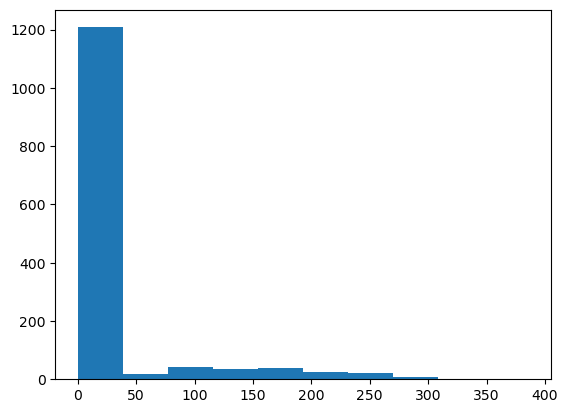

In [176]:
# EnclosedPorch: Enclosed porch area in square feet
plt.hist(df["EnclosedPorch"])
df["EnclosedPorch"].describe()
# drop for now

In [177]:
df=df.drop(columns=["EnclosedPorch"])

In [178]:
checkpoint_11=df.copy()

count    1399.000000
mean        3.558256
std        29.941275
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

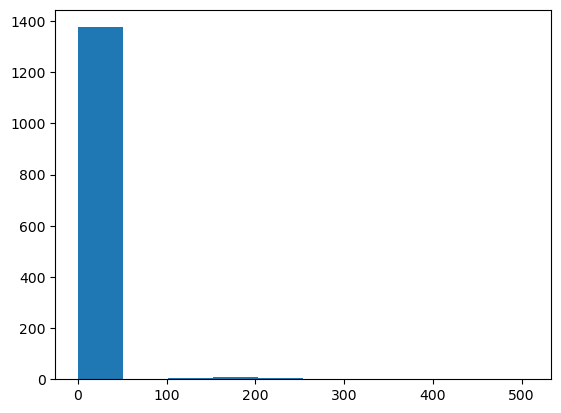

In [180]:
# 3SsnPorch: Three season porch area in square feet
plt.hist(df["3SsnPorch"])
df["3SsnPorch"].describe()
# drop, all 0s

In [181]:
df = df.drop(columns=["3SsnPorch"])

count    1399.000000
mean       14.734811
std        54.297626
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       440.000000
Name: ScreenPorch, dtype: float64

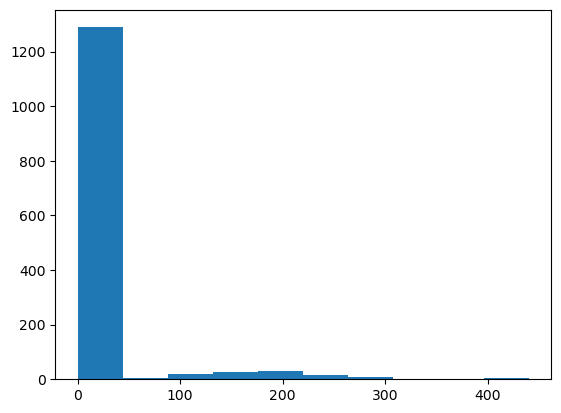

In [182]:
# ScreenPorch: Screen porch area in square feet
plt.hist(df["ScreenPorch"])
df["ScreenPorch"].describe()
# same as before, drop

In [183]:
df = df.drop(columns=["ScreenPorch"])

count    1399.000000
mean        1.773410
std        33.418545
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

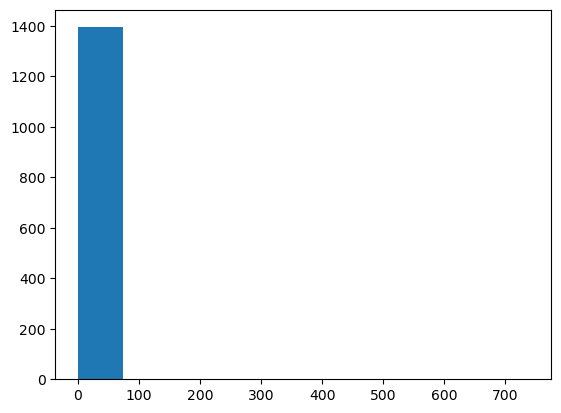

In [184]:
# PoolArea: Pool area in square feet
plt.hist(df["PoolArea"])
df["PoolArea"].describe()
#useless in this case, almost all 0s (no pool) we drop poolQuality as well

In [185]:
df = df.drop(columns=["PoolQC", "PoolArea"])

,num_elem,percentage
Fence,,
NF,1125,80.414582
MnPrv,154,11.007863
GdPrv,58,4.145818
GdWo,52,3.716941
MnWw,10,0.714796


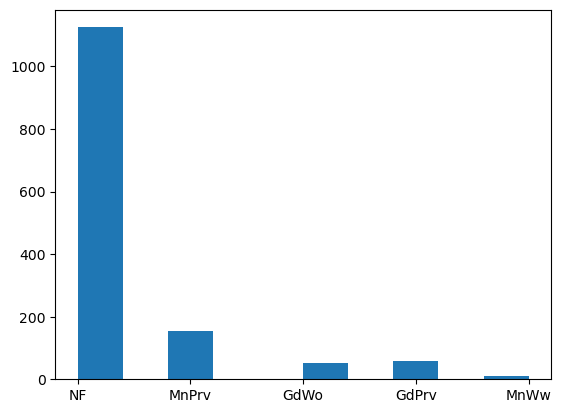

In [188]:
# Fence: Fence quality Measures privacy, has nulls when there is no fence we fill them with NF
df["Fence"]=df["Fence"].fillna("NF")
plt.hist(df["Fence"])
fence=rel_freq(df,"Fence")
fence
# keep for now

,num_elem,percentage
MiscFeature,,
NM,1349,96.426019
Shed,45,3.216583
Gar2,2,0.142959
Othr,2,0.142959
TenC,1,0.071480


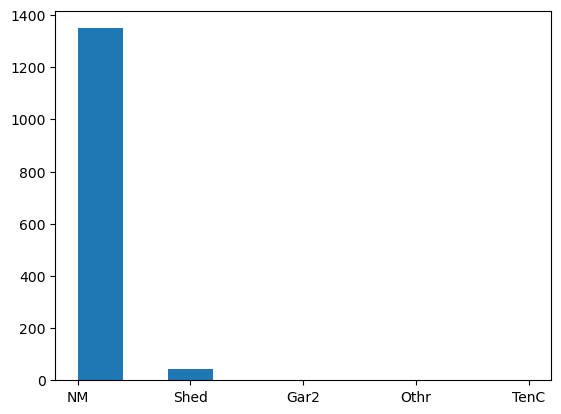

In [189]:
# MiscFeature: Miscellaneous feature not covered in other categories
df["MiscFeature"]=df["MiscFeature"].fillna("NM") # has nulls, NM no misc
plt.hist(df["MiscFeature"])
misc=rel_freq(df,"MiscFeature")
misc
# drop, as well as the value of this feature MiscVal

In [190]:
df = df.drop(columns=["MiscFeature","MiscVal"])

In [195]:
# we also drop sale cond and saletype majority of obsv fall into one cat
df = df.drop(columns=["SaleCondition","SaleType"])

In [196]:
df.head()

,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtHeight,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SalePrice
0,65.0,8450,Reg,Inside,CollgCr,Norm,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,0,2,1,3,1,Gd,8,0,NF,Attchd,2003.0,RFn,2,548,TA,Y,0,61,NF,2,2008,208500
1,80.0,9600,Reg,FR2,Veenker,Feedr,1Story,6,8,1976,1976,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,TA,Y,298,0,NF,5,2007,181500
2,68.0,11250,IR1,Inside,CollgCr,Norm,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,TA,Y,0,42,NF,9,2008,223500
3,60.0,9550,IR1,Corner,Crawfor,Norm,2Story,7,5,1915,1970,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,TA,Y,0,35,NF,2,2006,140000
4,84.0,14260,IR1,FR2,NoRidge,Norm,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,TA,Y,192,84,NF,12,2008,250000


In [202]:
df.to_csv("train_cleaned.csv")